# 📘 Titration Curves: Acid-Base Equilibria> Determine pKa from titration data⏱️ **15-25 minutes** | 📊 **Level: ●●○ Intermediate** | 🏷️ **Chemistry**---

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/imewei/NLSQ/blob/main/examples/notebooks/04_gallery/chemistry/titration_curves.ipynb)


In [1]:
# @title Install NLSQ (run once in Colab)
import sys

if 'google.colab' in sys.modules:
    print("Running in Google Colab - installing NLSQ...")
    !pip install -q nlsq
    print("✅ NLSQ installed successfully!")
else:
    print("Not running in Colab - assuming NLSQ is already installed")

Not running in Colab - assuming NLSQ is already installed


## 🔬 Domain Background**Model:** $pH = pK_a + \log\frac{[A^-]}{[HA]}$**Applications:** pKa determination, buffer analysis---

## Setup

In [2]:
# Configure matplotlib for inline plotting in VS Code/Jupyter
# MUST come before importing matplotlib
%matplotlib inline

In [3]:
from IPython.display import display

In [4]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np

from nlsq import curve_fit


def titration_curve(V, pKa, V_eq):
    fraction = V / V_eq
    fraction = jnp.clip(fraction, 1e-10, 1-1e-10)
    return pKa + jnp.log10(fraction / (1 - fraction))

## Generate Data

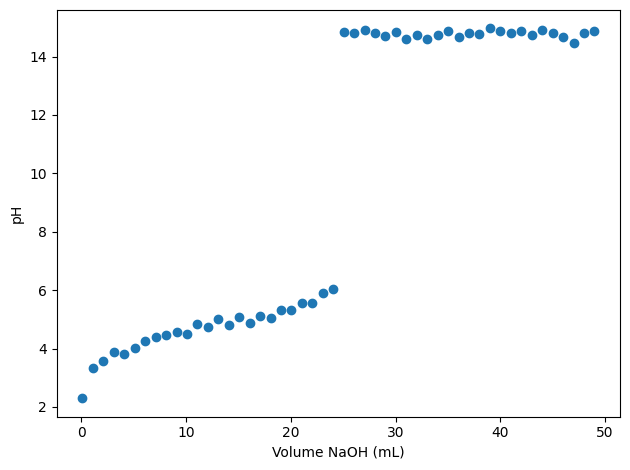

In [5]:
pKa_true, V_eq_true = 4.76, 25.0
V = np.linspace(0.1, 49, 50)
pH_true = titration_curve(V, pKa_true, V_eq_true)
pH = pH_true + np.random.normal(0, 0.1, len(V))

plt.plot(V, pH, 'o')
plt.xlabel('Volume NaOH (mL)')
plt.ylabel('pH')
plt.tight_layout()
plt.tight_layout()
plt.show()


## Fit Model

In [6]:
mask = (V > 5) & (V < 45)
popt, pcov = curve_fit(titration_curve, V[mask], pH[mask], p0=[4.5, 24])
pKa_fit, V_eq_fit = popt

print(f'pKa: {pKa_fit:.2f}')
print(f'Equivalence point: {V_eq_fit:.1f} mL')

INFO:nlsq.curve_fit:Starting curve fit n_params=2 | n_data_points=40 | method=trf | solver=auto | batch_size=None | has_bounds=False | dynamic_sizing=False


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=2 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-08


INFO:nlsq.optimizer.trf:Starting TRF optimization (no bounds) n_params=2 | n_residuals=40 | max_nfev=None


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=0 | cost=37.159809416278684 | grad_norm=1.1960 | nfev=1


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=1 | cost=37.13964460702088 | grad_norm=0.2840 | step=24.41823089414956 | nfev=2


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=2 | cost=37.11502618469311 | grad_norm=0.0627 | step=24.41823089414956 | nfev=3


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=3 | cost=37.11487811583701 | grad_norm=0.0053 | step=24.41823089414956 | nfev=4


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=4 | cost=37.11486185031884 | grad_norm=0.0019 | step=24.41823089414956 | nfev=5


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=5 | cost=37.11485974947724 | grad_norm=7.1809e-04 | step=24.41823089414956 | nfev=6


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=1.372005s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=6 | final_cost=37.1149 | elapsed=1.372s | final_gradient_norm=2.6540e-04


PERFORMANCE:nlsq.curve_fit:Timer: curve_fit elapsed=2.200152s


INFO:nlsq.curve_fit:Curve fit completed total_time=2.2002 | final_cost=74.2297 | covariance_warning=False


pKa: 4.52
Equivalence point: 23.7 mL


## Key Insights1. **pKa at half-equivalence point**2. **Buffer capacity maximum at pH = pKa**---